# Sensitivity 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1; compare trajectories manually

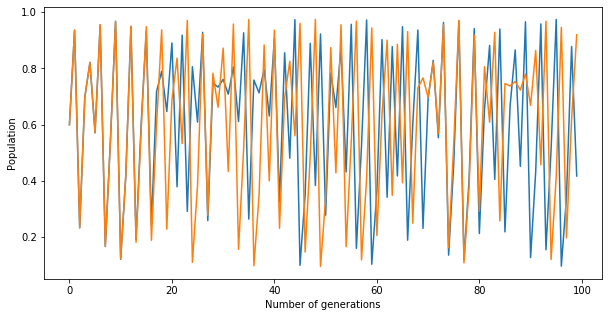

In [32]:
fig = plt.figure(figsize = (10,5))
starting_points = [0.600,0.60001] #As these numbers change, the beginning of the graph stays closer to the same for the beginning
nsteps = 100 
x = np.zeros(nsteps) 
r=3.9

for j in starting_points:
    x[0] = j 
    for i in range (1,nsteps):
        x[i] = r*x[i-1] * (1-x[i-1])  

    plt.plot(x); 
    plt.xlabel('Number of generations');
    plt.ylabel('Population');

# Exercise 2; prediction horizon

Role-playing: Let's say we actually use this equation to predict something 

Question: How far into the future can we reasonably predict?

Answer:
* If the question is about time, the answer will include a plot that has time as its horizontal axis. 
* If we have a plot with time as an axis and the question is about prediction quality, then probably the vertical axis should show some kind of prediction quality. 
* How to measure prediction quality? 
    * Option 1: Use pairs of trajectories, calculate mean absolute difference for each point in time. 
    * Option 2: Use a family of trajectories, noisify (wiggle, shake) the starting point, check how much variance it creates at each consecutive points. 

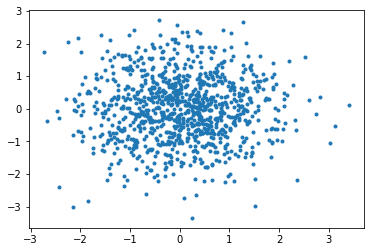

In [55]:
#A check that normal numbers generated by numpy actually look kinda normal 

plt.plot(np.random.randn(1000),np.random.randn(1000),'.');

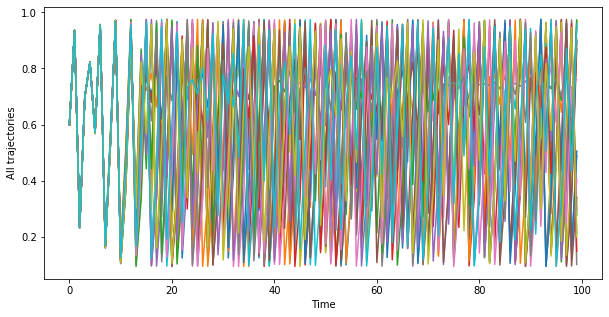

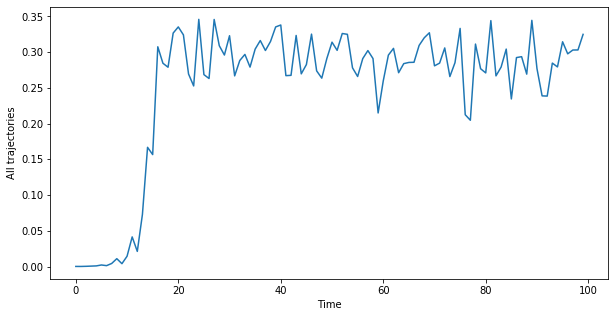

In [62]:
nsteps = 100 #Number of steps in our stimulation
ntraces = 20
x = np.zeros(shape=(nsteps,ntraces)) #Placeholder for trajectories we will generate
wiggle = 0.0001 #The standard deviation of the original noise in x[0]

r=3.9
for itrace in range(ntraces):
    x[0,itrace] = 0.6+np.random.randn(1) *wiggle
  
    for istep in range (1,nsteps):
        x[istep,itrace]= r*x[istep-1,itrace] * (1-x[istep-1,itrace])  

fig = plt.figure(figsize=(10,5))
plt.plot(x); 
plt.xlabel('Time');
plt.ylabel('All trajectories');

fig = plt.figure(figsize=(10,5))
plt.plot(np.std(x,axis=1)); #Standard Deviation calculation
plt.xlabel('Time');
plt.ylabel('All trajectories');
